In [2]:
#Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [3]:
#importing dataset
df=pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Predicting the price of cars based on a wide range of attributes or features.Using dataset containing details of car such as safetyratings,enginetype,fueltype etc we aim to develop a machine learning model that accurately estimates the price of cars.

## Data Exploration

In [5]:
df.info()
#provides column nsmes,corresponding non null value count and their dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No null values are present in any of the column

In [7]:
#checking the unique value count
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [8]:
#checking various categories present in different categorical columns
#categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns=['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']
     

In [9]:
for column in categorical_columns:
    unique_values=df[column].unique()
    print(f"\nUnique Values for {column}:")
    print(unique_values)



Unique Values for fueltype:
['gas' 'diesel']

Unique Values for aspiration:
['std' 'turbo']

Unique Values for doornumber:
['two' 'four']

Unique Values for carbody:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique Values for drivewheel:
['rwd' 'fwd' '4wd']

Unique Values for enginelocation:
['front' 'rear']

Unique Values for enginetype:
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

Unique Values for cylindernumber:
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

Unique Values for fuelsystem:
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [10]:
#Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There seems to be some spelling error in the CompanyName column.

In [12]:
df.CompanyName=df.CompanyName.str.lower()
def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
#checking duplicates
df.duplicated().sum()

0

No Duplicates

In [14]:
#check statistics of dataset
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


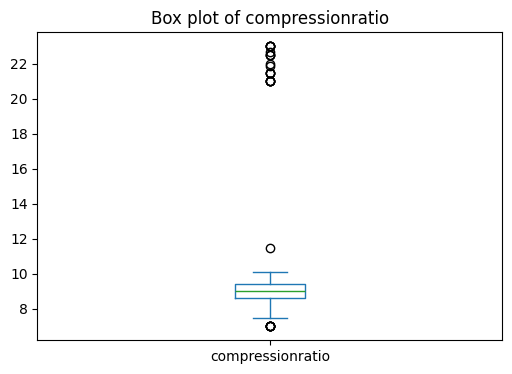

In [15]:
plt.figure(figsize=(6, 4))
df['compressionratio'].plot(kind='box')
plt.title('Box plot of compressionratio')
plt.show()

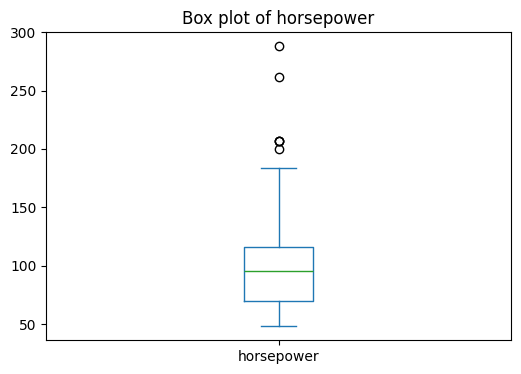

In [16]:
plt.figure(figsize=(6, 4))
df['horsepower'].plot(kind='box')
plt.title('Box plot of horsepower')
plt.show()

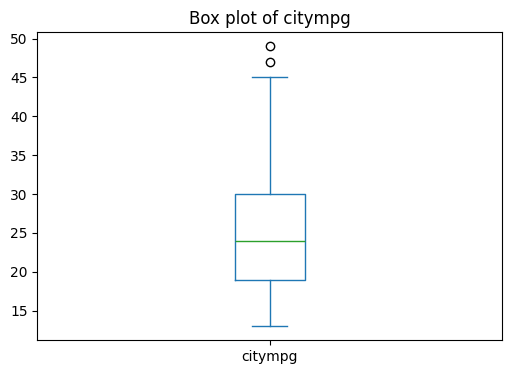

In [17]:
plt.figure(figsize=(6, 4))
df['citympg'].plot(kind='box')
plt.title('Box plot of citympg')
plt.show()

Potential outliers present in compressionratio and horsepower.

In [18]:
#Distribution of numerical variables
numerical_column=df.select_dtypes(include=['float','int']).columns
numerical_column

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

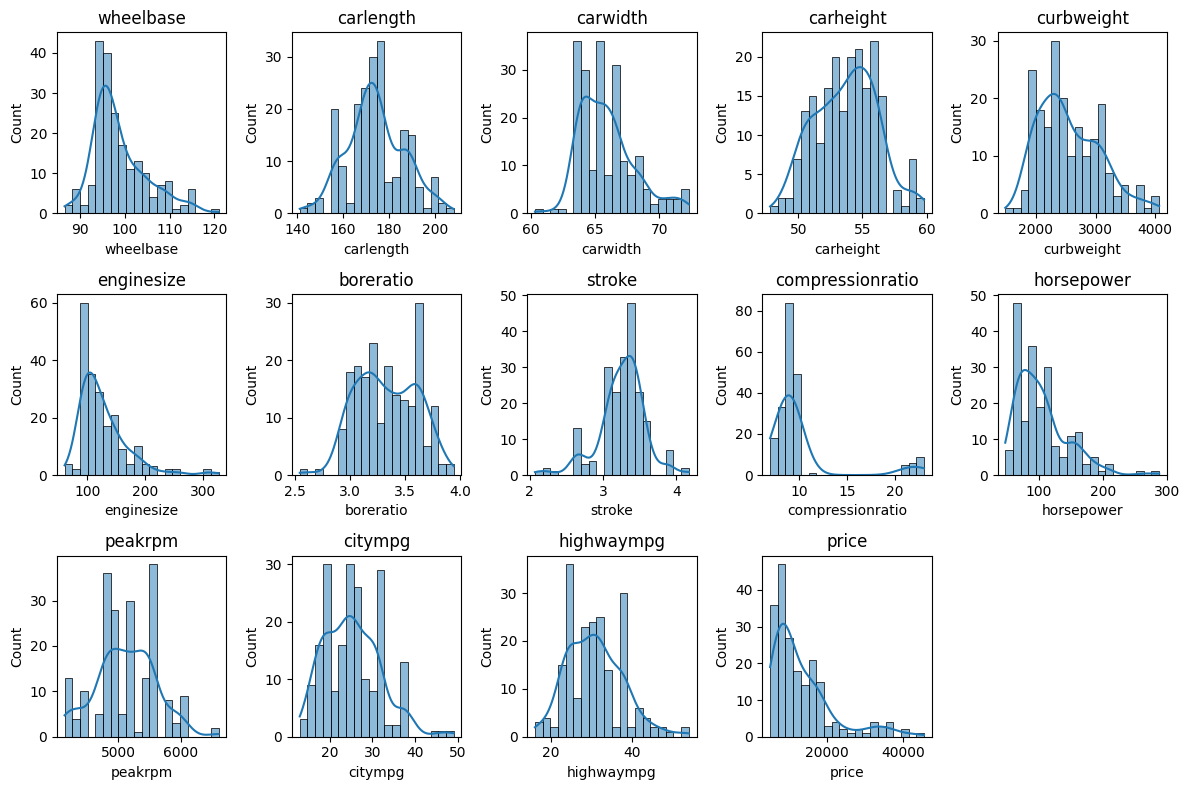

In [19]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [20]:
price_summary=df['price'].describe()
price_summary

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

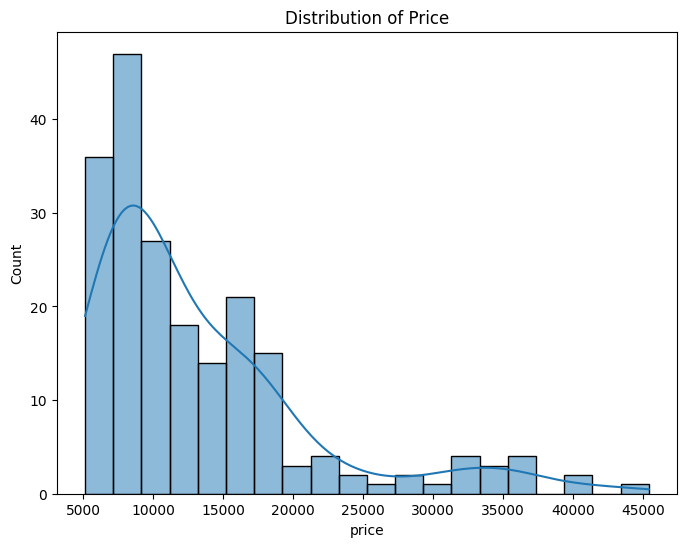

In [21]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

Here the price distribution is right skewed.

In [22]:
#skewness
price_skewness=df['price'].skew()
price_skewness

1.7776781560914454

The data is significantly skewed to the right, suggesting that the majority of the data points are concentrated on the left side of the distribution,
with fewer but larger values extending towards the right.
also the mean > Median.

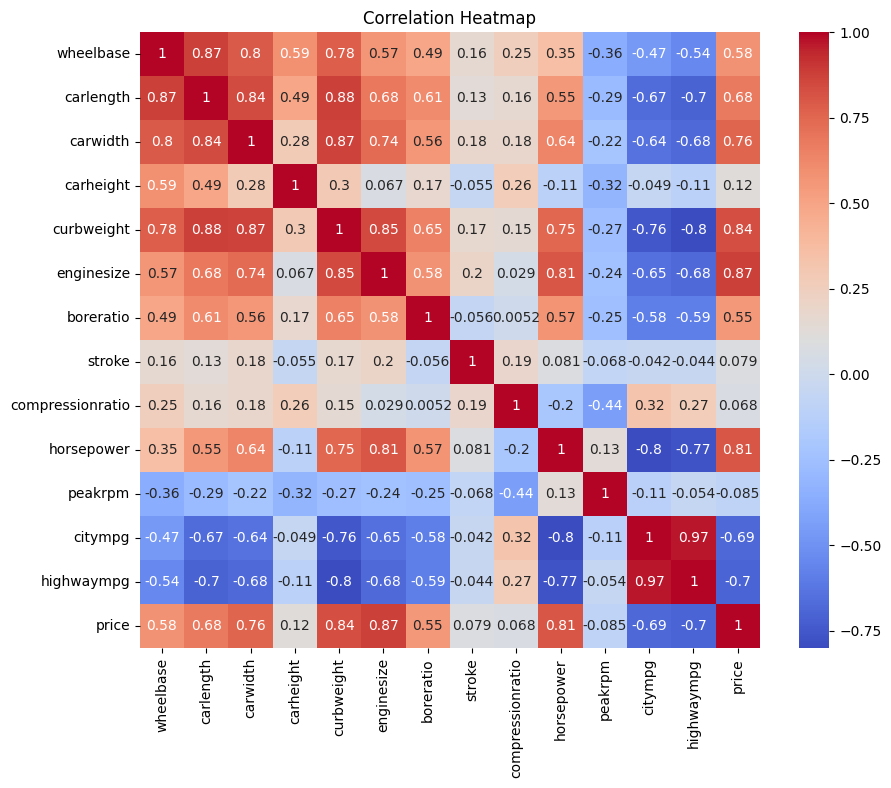

In [23]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is a slightly high positive correlation between the price and carwidth,enginsize,horsepower,curbweight
and no other variables has a significant impact on car price.

In [24]:
#visualizing the relationship between two continuous variables or between a continuous variable and a categorical variable

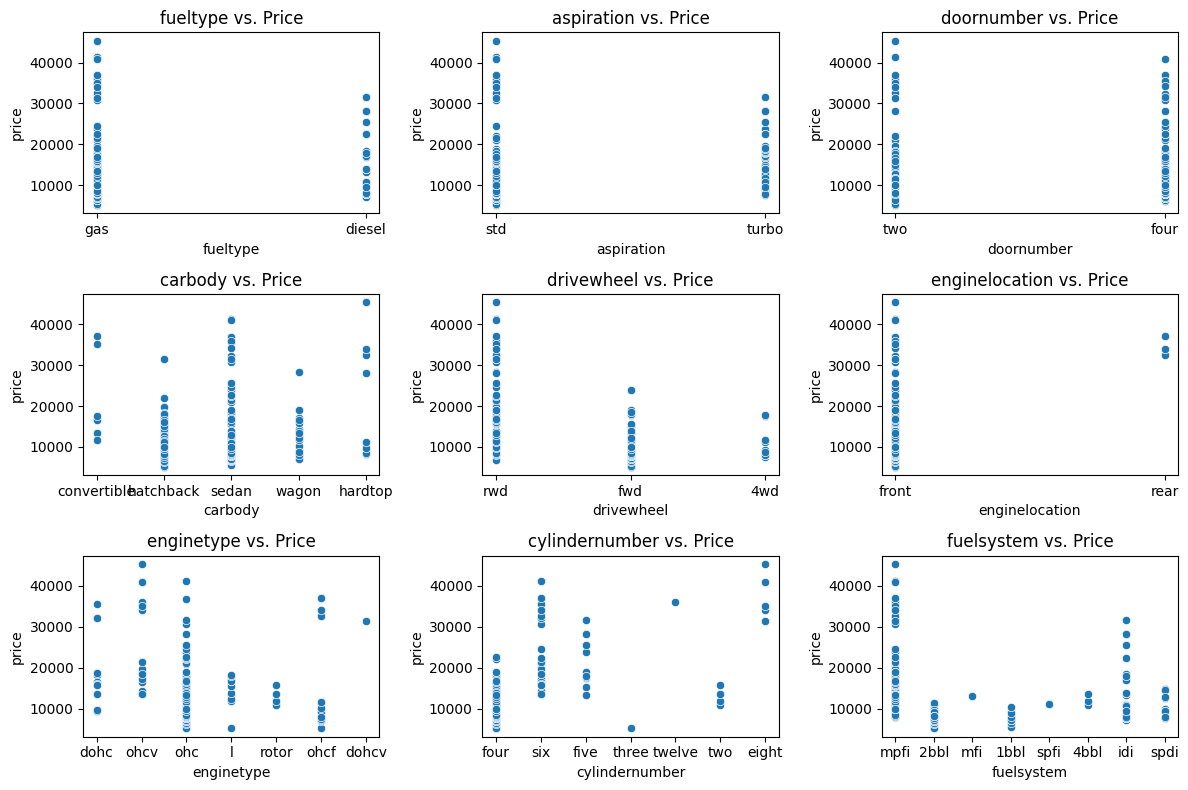

In [25]:
#method 2
plt.figure(figsize=(12, 8))

# Convert Index object to a list
categorical_columns_list = list(categorical_columns)

for feature in categorical_columns_list:
    plt.subplot(3, 3, categorical_columns_list.index(feature) + 1)
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')

plt.tight_layout()
plt.show()

In [26]:
#comparing the distribution of a continuous variable(price)  across different categories of a categorical variable.

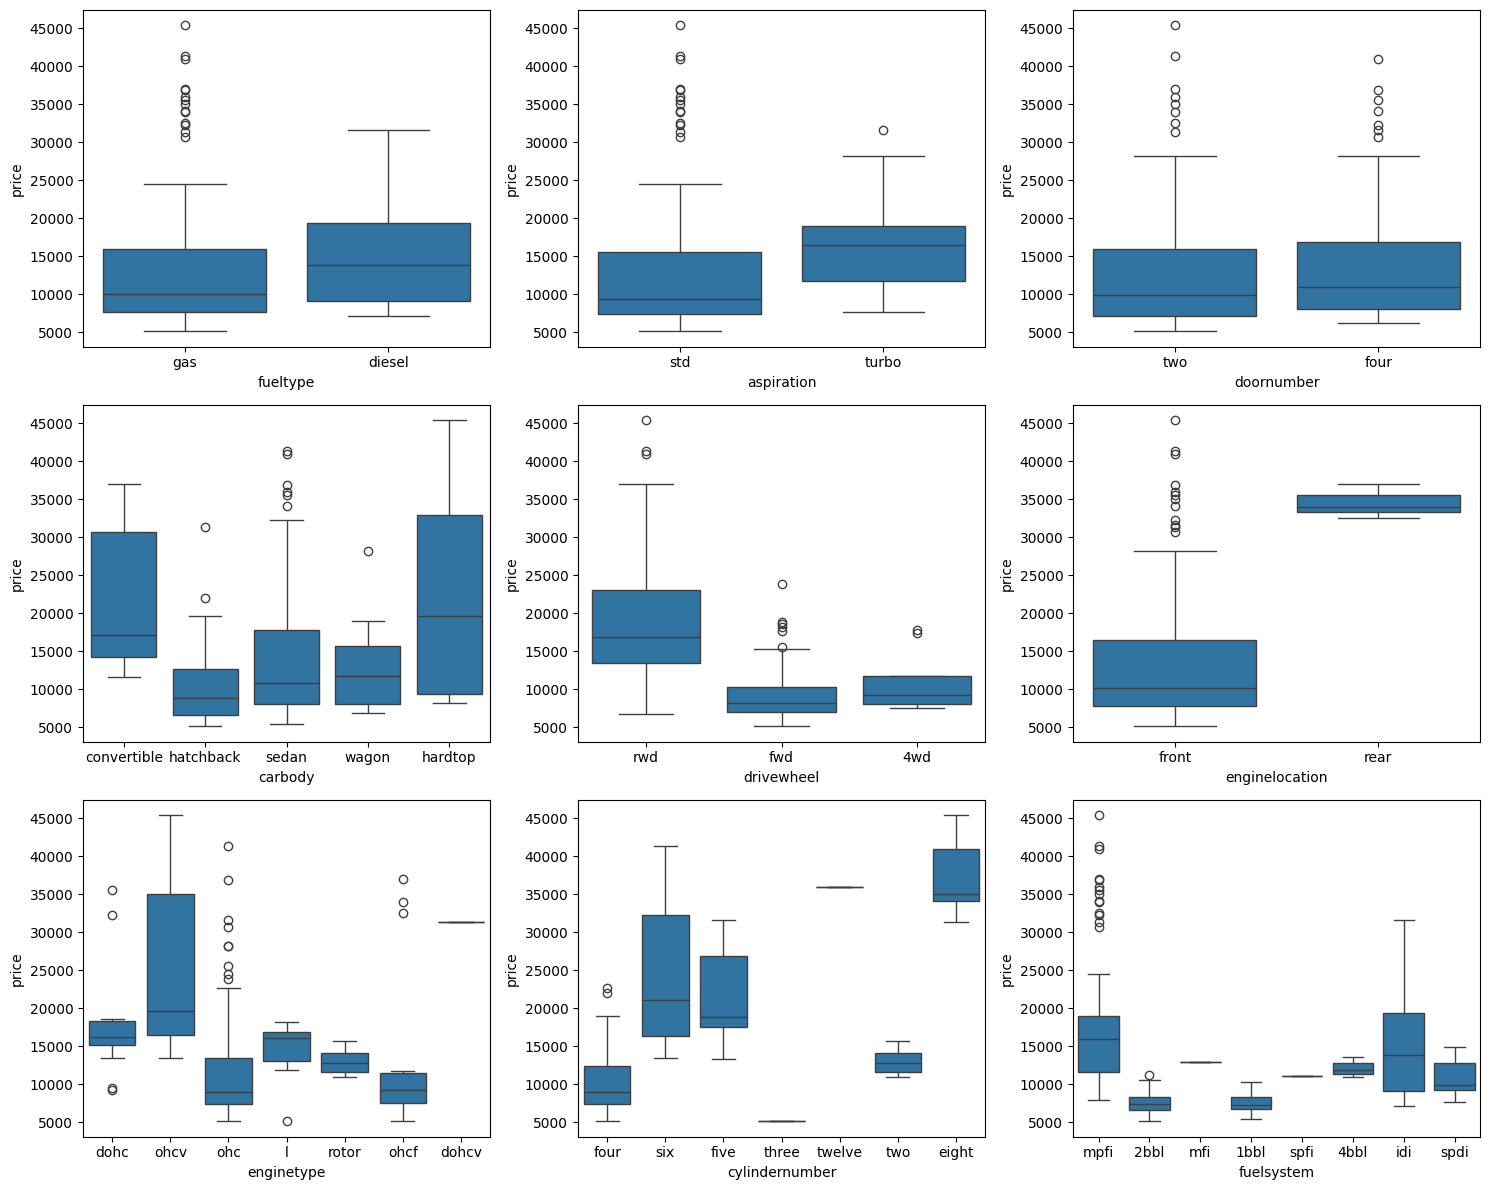

In [27]:
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed

num_rows = (len(categorical_columns) + 2) // 3  # Calculate the number of rows needed
num_cols = min(len(categorical_columns), 3)   # Set the number of columns to 3 or less


for i, feature in enumerate(categorical_columns): #We loop through each categorical column (feature) in the categorical_columns list using enumerate() to get both the index and the value.
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df, x=feature, y='price')
plt.tight_layout()
plt.show()

1. Most use car working in gas , and the average price is less than the car working in diesel.
2. The most common engine type is "ohc," correlating with lower prices.
3. Majority of users opt for [Front-Wheel Drive (fwd)]> for their cars, possibly due to its lower price.
4. Most people prefer the Sedan car type, while higher-priced types like Convertible and Hardtop are also popular choices.
   



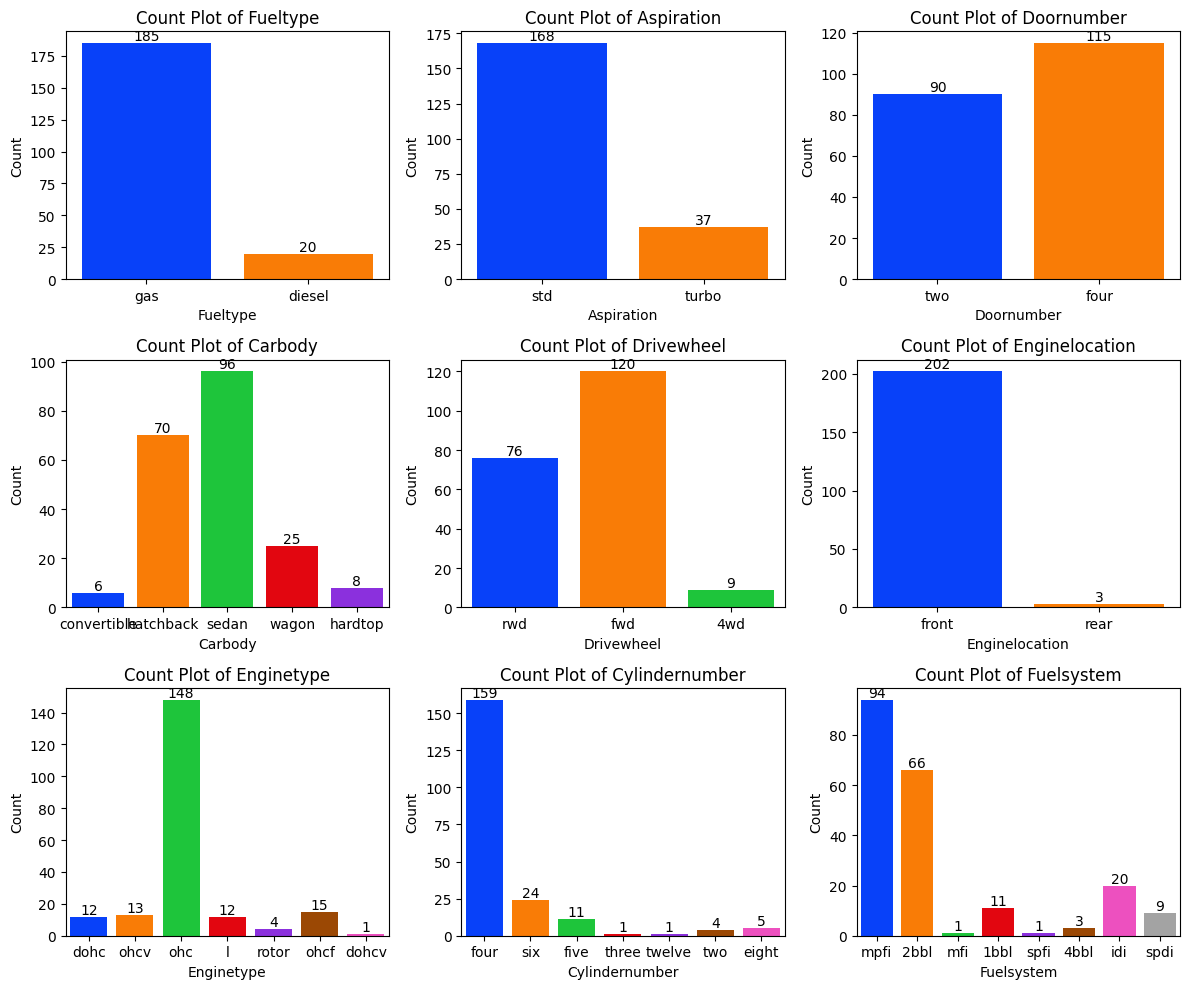

In [28]:
#count plot of each categorical features to Show the counts of observations in each categorical bin using bars.
#list of categorical column to analyze
categorical_columns=['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']

#create subplots
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
axes=axes.ravel() #generates a one-dimensional array by unraveling the elements in row-major 
## Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns): #enumerate(categorical_columns): This function pairs each item in the categorical_columns list with its corresponding index. 
                                                 #It returns an iterable where each item is a tuple containing the index and the value from the list.
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95,hue=column)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')


# Adjust layout and show plots
plt.tight_layout()
plt.show()

From above count plot is clearly visualising the count of observations in each categories.
1.Car using gas as a fueltype is more than diesel
2.car with foor doors are preferred by more users
3.Most of the people uses car with fwd drivewheel
4.more used enginetype is ohc

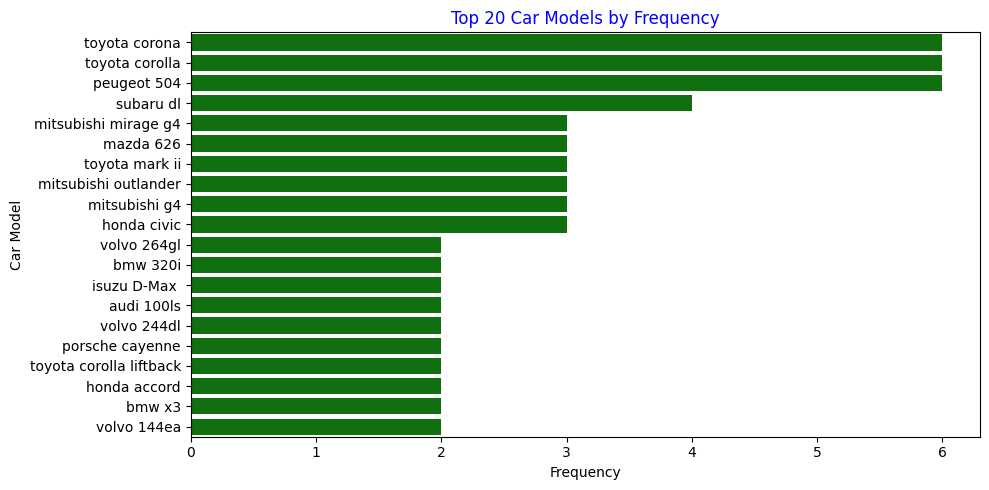

In [29]:
#Top 20 car models in frequency
n=20
top_model_cars=df['CarName'].value_counts().head(n)

#plotting top 5 cars in frequency
plt.figure(figsize=(10, 5))
sns.barplot(x=top_model_cars.values, y=top_model_cars.index,color='green')
plt.title(f'Top {n} Car Models by Frequency',color='blue')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Toyot corona , toyota corolla , peugeot 504 is in highest position in terms of frequency.

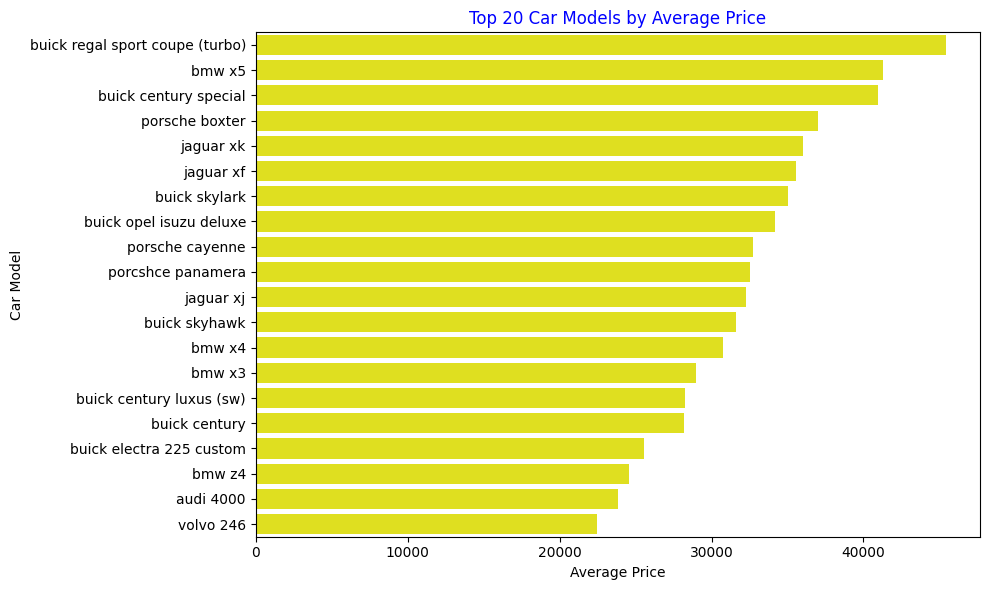

In [30]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,color='yellow')
plt.title(f'Top {n} Car Models by Average Price',color='blue')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

in terms of average price buik regal sport coupe is in the highest poition and volvo 246 os having the lowest price.

When increasing the number of cylinders, the price tends to increase, though the majority of users stick with 4 cylinders.

As the engine size increases, so does the price
.
The wheelbase, car length, and car width have an effect on the price, but the car height doesn't seem to have any significant impact.



### Data Preprocessing

In [31]:
#Label Encoding : converting categorical to numerical variable
categorical_column=df.select_dtypes(include=['object']).columns
                     
categorical_column
label_encoder = LabelEncoder()
#This line creates an instance of the LabelEncoder class, which will be used to encode categorical variables.

for column in categorical_column:
    df[column]=label_encoder.fit_transform(df[column])
#This loop iterates over each column  in the categorical_colum
#it applies the fit_transform method of the LabelEncoder object to encode the column's values with integer labels.
#The original values in the column are replaced with their encoded integer labels.

In [32]:
df.dtypes

car_ID                int64
symboling             int64
CarName               int32
CompanyName           int32
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [33]:
columns=['CarName','CompanyName']
Label_encoder = LabelEncoder()
#This line creates an instance of the LabelEncoder class, which will be used to encode categorical variables.

for column in columns:
    df[column]=Label_encoder.fit_transform(df[column])

In [34]:
df.dtypes

car_ID                int64
symboling             int64
CarName               int64
CompanyName           int64
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [35]:
# Feature scaling
#Standard Scaling
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Train the Model

In [36]:
#splitting the data
# X should contain the features used for prediction, and y should contain the target variable
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

#model fitting
model=LinearRegression()
model.fit(X_train,y_train)



Shape of X_train: (164, 26)
Shape of X_test: (41, 26)
Shape of y_train: (164,)
Shape of y_test: (41,)


LinearRegression()

In [47]:
# Construct the equation
equation = f"price = {intercept:.2f}"
for feature, coefficient in zip(X.columns, coefficients):
    equation += f" + ({coefficient:.2f} * {feature})"

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
price = 9975.78 + (79.92 * car_ID) + (158.24 * symboling) + (-11.40 * CarName) + (-886.02 * CompanyName) + (8461.03 * fueltype) + (998.57 * aspiration) + (-914.49 * doornumber) + (-826.04 * carbody) + (13.25 * drivewheel) + (12059.65 * enginelocation) + (903.61 * wheelbase) + (-690.36 * carlength) + (1283.89 * carwidth) + (461.06 * carheight) + (1508.32 * curbweight) + (-9.73 * enginetype) + (516.58 * cylindernumber) + (3009.29 * enginesize) + (14.25 * fuelsystem) + (158.44 * boreratio) + (-714.84 * stroke) + (2776.84 * compressionratio) + (830.74 * horsepower) + (509.47 * peakrpm) + (-1179.37 * citympg) + (1136.28 * highwaympg)


In [37]:
#intercept
intercept=model.intercept_
intercept

9975.781707076554

In [38]:
#slope
coefficients=model.coef_
coefficients

array([ 7.99223884e+01,  1.58244688e+02, -1.13959646e+01, -8.86022355e+02,
        8.46102845e+03,  9.98568433e+02, -9.14489128e+02, -8.26040836e+02,
        1.32478423e+01,  1.20596513e+04,  9.03614625e+02, -6.90363921e+02,
        1.28388991e+03,  4.61062400e+02,  1.50832164e+03, -9.72561932e+00,
        5.16582766e+02,  3.00929430e+03,  1.42540363e+01,  1.58442905e+02,
       -7.14837779e+02,  2.77683785e+03,  8.30744260e+02,  5.09473763e+02,
       -1.17937445e+03,  1.13627783e+03])

In [63]:
y_predicted_train=model.predict(X_train)

In [39]:
y_predicted_test=model.predict(X_test)
y_predicted_test

array([26199.01262072, 18885.48620945, 10359.74013919, 12400.07753778,
       29011.2627033 ,  6671.88764424,  7986.52844715,  5953.81018511,
        9213.38171117,  7854.9676529 , 13319.73507475,  5665.86496974,
       15813.12744558, 10628.53533626, 40699.0100363 ,  5580.60620695,
        3268.10942355, 13955.55270956,  9958.89663413,  9458.50120977,
       10891.17013169, 20524.7054644 ,  8153.20325547,  4260.02507114,
        7592.05092794, 25741.04365854, 13136.6377179 , 15970.92162767,
        5854.48655383, 15947.2266962 , 28636.03887174,  7254.68544757,
        4687.53017538, 22085.44300783,  7216.62815103, 29059.50928044,
       10246.01503061, 10119.8035702 ,  7124.48200793, 14414.11833009,
        7550.95036311])

In [40]:
X_test.iloc[1]

car_ID              10.000000
symboling            0.000000
CarName              8.000000
CompanyName          1.000000
fueltype             1.000000
aspiration           1.000000
doornumber           1.000000
carbody              2.000000
drivewheel           0.000000
enginelocation       0.000000
wheelbase            0.123757
carlength            0.337262
carwidth             0.930947
carheight           -0.707626
curbweight           0.957693
enginetype           3.000000
cylindernumber       1.000000
enginesize           0.098522
fuelsystem           5.000000
boreratio           -0.739338
stroke               0.462183
compressionratio    -0.793101
horsepower           1.416637
peakrpm              0.787855
citympg             -1.412700
highwaympg          -1.273900
Name: 9, dtype: float64

In [45]:
y_test.iloc[1] #y

17859.167

In [46]:
y_predicted_test[1] #y_hat

18885.486209450908

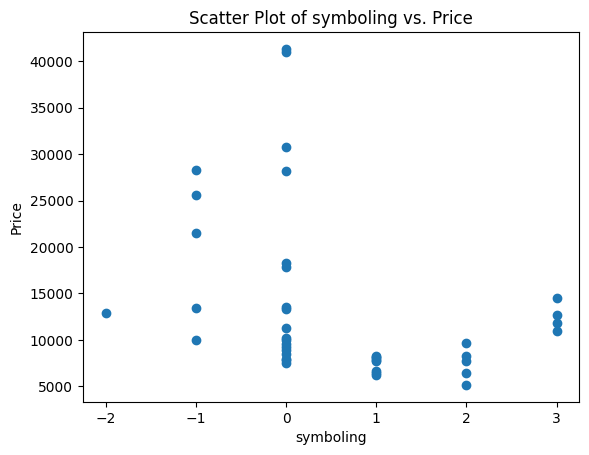

In [60]:
import matplotlib.pyplot as plt

# Choose a single feature to visualize (e.g., the first feature)
feature_to_visualize = X_test.columns[1]

# Plot the chosen feature against the target variable
plt.scatter(X_test[feature_to_visualize], y_test)
plt.xlabel(feature_to_visualize)
plt.ylabel('Price')
plt.title(f'Scatter Plot of {feature_to_visualize} vs. Price')
plt.show()

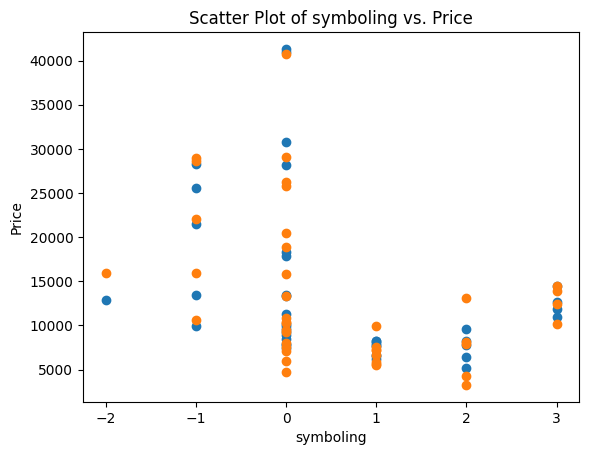

In [61]:
#scatterplot of test data
plt.scatter(X_test[feature_to_visualize], y_test)

#plot the prediction made by the model
plt.scatter(X_test[feature_to_visualize], y_predicted_test)
plt.xlabel(feature_to_visualize)
plt.ylabel('Price')
plt.title(f'Scatter Plot of {feature_to_visualize} vs. Price')
plt.show()

In [49]:
# Evaluate the model
mse = mean_squared_error(y_test, y_predicted_test)
r2_square = r2_score(y_test,y_predicted_test)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8695392598537779
Mean Squared Error: 10299095.394078957


The R-squared value of approximately 0.87 suggests that the model provides a good fit to the data, explaining about 87% of the variability in the target variable.
The relatively low MSE further supports the model's goodness of fit, indicating that the model's predictions are accurate on average.

In [64]:
mse = mean_squared_error(y_train, y_predicted_train)
r2_square = r2_score(y_train,y_predicted_train)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.9163527644531247
Mean Squared Error: 4988540.231333433


##### By comparing the R-squared scores on both training and test data, you can assess the model's performance and whether it is overfitting or underfitting. If the R-squared score is significantly higher on the training data compared to the test data, it may indicate overfitting. Conversely, if the scores are similar but low, it may indicate underfitting..

In [62]:
model.score(X_test,y_test) #same as r2_square

0.8695392598537779

In [66]:
#cross_validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,y_train,cv=5) #cv=5 no of times divided 
scores

array([0.84417252, 0.90191298, 0.84083073, 0.89271245, 0.87968419])

In [67]:
scores.mean()

0.8718625732051326

The performance metrics obtained from all iterations are averaged to obtain a single estimate of the model's performance.